In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head(10)

,Feature_1,Feature_2,Feature_3,Output
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647
5,-0.889889,-1.580945,-0.422793,-77.897356
6,-2.685109,0.018421,1.722669,-75.231606
7,0.663188,0.185268,-1.883424,-57.492711
8,0.319196,-2.983970,-1.515216,-54.176286
9,-0.348368,-1.811019,0.746892,29.469835


In [4]:
x = df.iloc[:,:3].values
y = df.iloc[:,-1].values

In [5]:
print(x)

[[-5.70562824e-01  1.42034230e+00  4.95580395e-01]
 [-9.90562704e-01  5.56964528e-01  1.04506399e+00]
 [-6.74727510e-01  1.50616865e-01  1.77464503e+00]
 [ 3.88250414e-01 -3.87127181e-01 -1.10229155e-01]
 [ 1.16788229e+00 -2.41044700e-02  1.45063214e-01]
 [-8.89888979e-01 -1.58094538e+00 -4.22792727e-01]
 [-2.68510868e+00  1.84207950e-02  1.72266920e+00]
 [ 6.63187770e-01  1.85267835e-01 -1.88342383e+00]
 [ 3.19196176e-01 -2.98397020e+00 -1.51521566e+00]
 [-3.48368316e-01 -1.81101917e+00  7.46891531e-01]
 [-6.37134863e-01 -5.39574612e-01 -4.08345242e-01]
 [ 1.11594518e+00 -3.03033670e-02 -3.19590141e-01]
 [-6.89599657e-01 -3.57440729e-01 -5.41503716e-01]
 [ 2.07087853e+00  1.06979836e+00  5.93588115e-01]
 [-7.12849796e-01 -1.50891712e+00 -2.52815988e-01]
 [ 8.87925723e-01 -8.23886105e-01  4.36232115e-01]
 [-2.94033248e-01 -6.87859510e-01  7.86362918e-01]
 [-1.47394283e+00  2.01965064e+00 -2.87856460e-02]
 [-1.35804520e+00 -6.71104720e-02 -1.69436857e-01]
 [ 2.87657229e-01 -1.79480704e+

In [6]:
print(y)

[  -9.76318213  -24.02935493   45.61642069   34.13573658   86.66364674
  -77.89735638  -75.23160582  -57.49271113  -54.17628622   29.46983531
  -87.07697894   61.49707765  -87.1908553   189.5258672  -105.6094091
   72.93452847   33.37559704 -108.0026368  -127.0327015   -97.32244317
  -56.51293004  -61.6929032   -46.54502761  -55.46277415   98.27590634
   53.88321804  -69.66191612  143.0790234  -114.6199753    31.85127955
  -44.39024034    1.48968394  -88.71622065   87.12681822  -17.28585002
  150.2016958   -71.41503479 -139.825719    190.1339933   126.7899784
  191.1403996   -15.88018358   79.0476178    32.44367679   43.23159853
  -34.70291861  -94.49899703   92.90733739  -49.79965934 -257.0634266
  -28.33835823   52.78981793 -114.2497357    31.88367296   80.14978081
   85.36236114  -95.10607425  -42.28614302   -2.46076531  215.0467558
  114.5172697     4.77928361  -52.48979813 -137.6070487   135.6739105
   41.67465033   38.9722792    84.06925184  -55.00253103  -69.78986858
  -27.96839

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [9]:
# Doing Prediction
y_pred = model.predict(X_test)

## 1. Linear Relationship

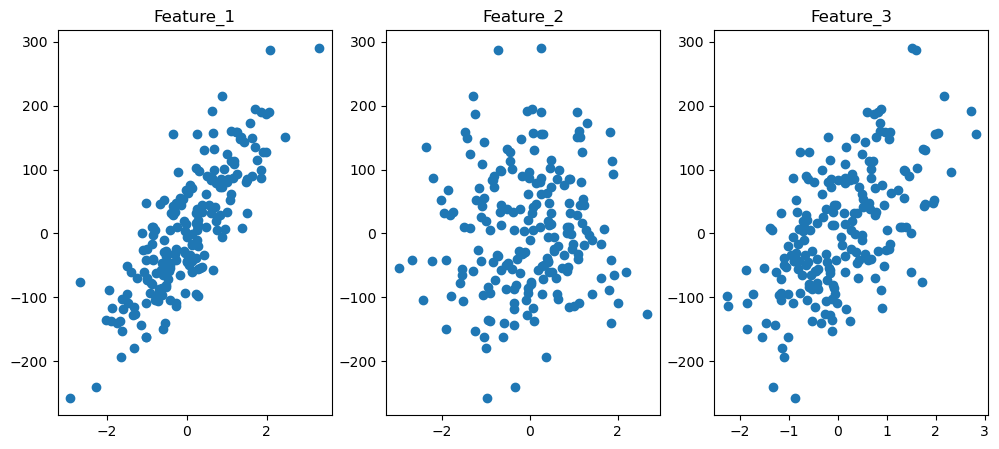

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

ax1.scatter(df['Feature_1'], df['Output'])
ax1.set_title("Feature_1")
ax2.scatter(df['Feature_2'], df['Output'])
ax2.set_title("Feature_2")
ax3.scatter(df['Feature_3'], df['Output'])
ax3.set_title("Feature_3")
plt.show()

## 2. MultiCollinearity

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(3):
    vif.append(variance_inflation_factor(X_train, i))

In [12]:
for i in range(0,3):
    print(f" Vif value of Feature_{i+1} = {vif[i]}")

 Vif value of Feature_1 = 1.010325703326072
 Vif value of Feature_2 = 1.009871080064783
 Vif value of Feature_3 = 1.0139501973122556


## Caculating Residuals

In [13]:
residuals = y_test - y_pred

## 3. Normality of Residuals

Text(0.5, 1.0, 'Distribution of Residuals')

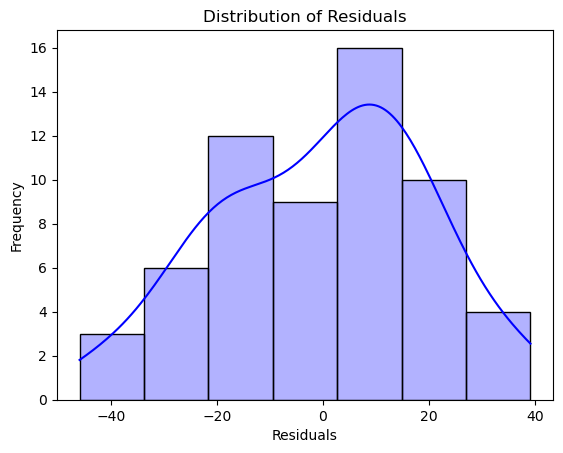

In [14]:
sns.histplot(residuals, kde=True, color='blue', alpha=0.3)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')


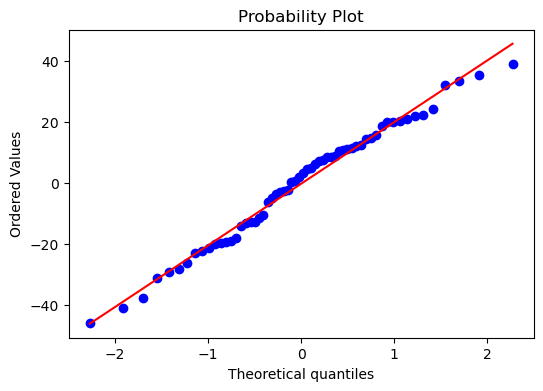

In [15]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residuals, plot=ax, fit=True)

plt.show()

## 4. Homoscedasticity

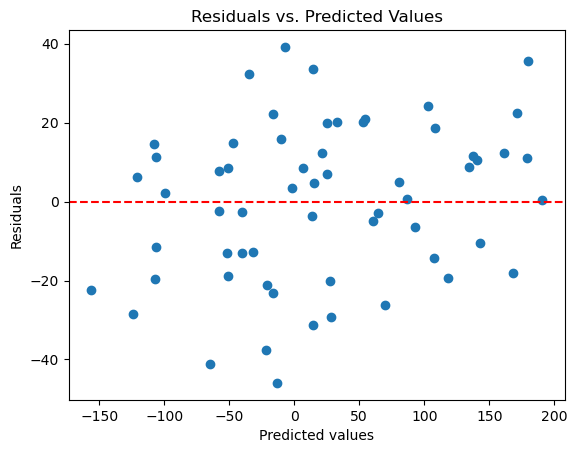

In [16]:
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

## 5. Independence of Error (Residuals)

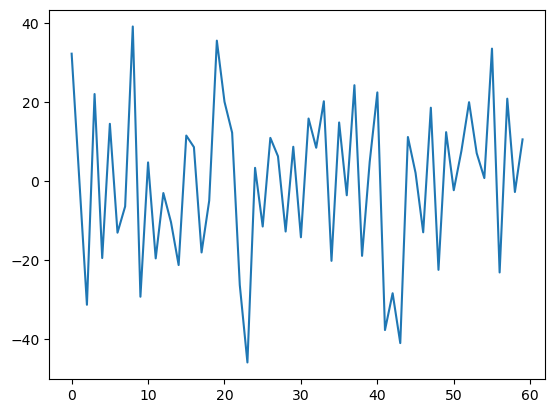

In [17]:
plt.plot(residuals)